### Import Libraries

In [40]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

### Data Asessment

In [2]:
file_path = './dataset-jogja-2021'

all_df = []

for filename in os.listdir(file_path):
	if filename.endswith(".csv"):
		df = pd.read_csv(os.path.join(file_path, filename))
		all_df.append(df)

concatenated_df = pd.concat(all_df, axis=0, ignore_index=True)
combined_df = concatenated_df.drop_duplicates(keep='first')
combined_df.to_csv('./jogja-dataset.csv', index=False)

In [3]:
df = pd.read_csv('./jogja-dataset.csv')
df

,Date,Time,PM2.5,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,4/1/2021,00:00:00,45.0,19.0,21.0,15.0,8.0,3.0,21,PM2.5,Good
1,4/1/2021,01:00:00,44.0,18.0,20.0,14.0,8.0,3.0,20,PM2.5,Good
2,4/1/2021,02:00:00,43.0,17.0,20.0,14.0,7.0,3.0,20,PM2.5,Good
3,4/1/2021,03:00:00,40.0,17.0,20.0,13.0,7.0,3.0,20,PM2.5,Good
4,4/1/2021,04:00:00,38.0,16.0,19.0,12.0,7.0,3.0,19,PM2.5,Good
...,...,...,...,...,...,...,...,...,...,...,...
8755,9/30/2021,19:00:00,35.0,19.0,0.0,7.0,4.0,4.0,35,PM2.5,Good
8756,9/30/2021,20:00:00,35.0,19.0,0.0,7.0,4.0,4.0,35,PM2.5,Good
8757,9/30/2021,21:00:00,36.0,19.0,0.0,7.0,5.0,4.0,36,PM2.5,Good
8758,9/30/2021,22:00:00,36.0,20.0,0.0,7.0,5.0,4.0,36,PM2.5,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                8760 non-null   object 
 1   Time                8760 non-null   object 
 2   PM2.5               8527 non-null   float64
 3   PM10                8527 non-null   float64
 4   SO2                 6243 non-null   float64
 5   CO                  8526 non-null   float64
 6   O3                  5806 non-null   float64
 7   NO2                 8526 non-null   float64
 8   Max                 8760 non-null   int64  
 9   Critical Component  8527 non-null   object 
 10  Category            8760 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 752.9+ KB


In [5]:
df.describe()

,PM2.5,PM10,SO2,CO,O3,NO2,Max
count,8527.000000,8527.000000,6243.000000,8526.000000,5806.000000,8526.000000,8760.000000
mean,37.982292,18.135335,14.866090,12.747478,20.320703,4.183908,39.112215
std,18.454578,7.865541,11.113798,7.552322,17.721537,2.274109,16.800810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,13.000000,5.000000,7.000000,3.000000,3.000000,25.000000
50%,38.000000,17.000000,17.000000,11.000000,19.000000,4.000000,38.000000
75%,53.000000,22.000000,21.000000,19.000000,33.000000,5.000000,53.000000
max,92.000000,52.000000,64.000000,38.000000,77.000000,12.000000,92.000000


In [6]:
df.isnull().sum()

Date                     0
Time                     0
PM2.5                  233
PM10                   233
SO2                   2517
CO                     234
O3                    2954
NO2                    234
Max                      0
Critical Component     233
Category                 0
dtype: int64

In [7]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(columns=['Date', 'Time'])
df = df.parse_dates('Datetime')

df.head()

,PM2.5,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category,Datetime
0,45.0,19.0,21.0,15.0,8.0,3.0,21,PM2.5,Good,2021-04-01 00:00:00
1,44.0,18.0,20.0,14.0,8.0,3.0,20,PM2.5,Good,2021-04-01 01:00:00
2,43.0,17.0,20.0,14.0,7.0,3.0,20,PM2.5,Good,2021-04-01 02:00:00
3,40.0,17.0,20.0,13.0,7.0,3.0,20,PM2.5,Good,2021-04-01 03:00:00
4,38.0,16.0,19.0,12.0,7.0,3.0,19,PM2.5,Good,2021-04-01 04:00:00


In [8]:
interpolated_col = ['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2']

df[interpolated_col] = df[interpolated_col].interpolate(method='linear', limit_direction='both')
df.isnull().sum()

PM2.5                   0
PM10                    0
SO2                     0
CO                      0
O3                      0
NO2                     0
Max                     0
Critical Component    233
Category                0
Datetime                0
dtype: int64

In [9]:
df['Critical Component'] = df['Critical Component'].fillna(method='ffill').fillna(method='bfill')
df.isnull().sum()

C:\Users\andid\AppData\Local\Temp\ipykernel_23072\2717450895.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Critical Component'] = df['Critical Component'].fillna(method='ffill').fillna(method='bfill')


PM2.5                 0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
Datetime              0
dtype: int64

### EDA

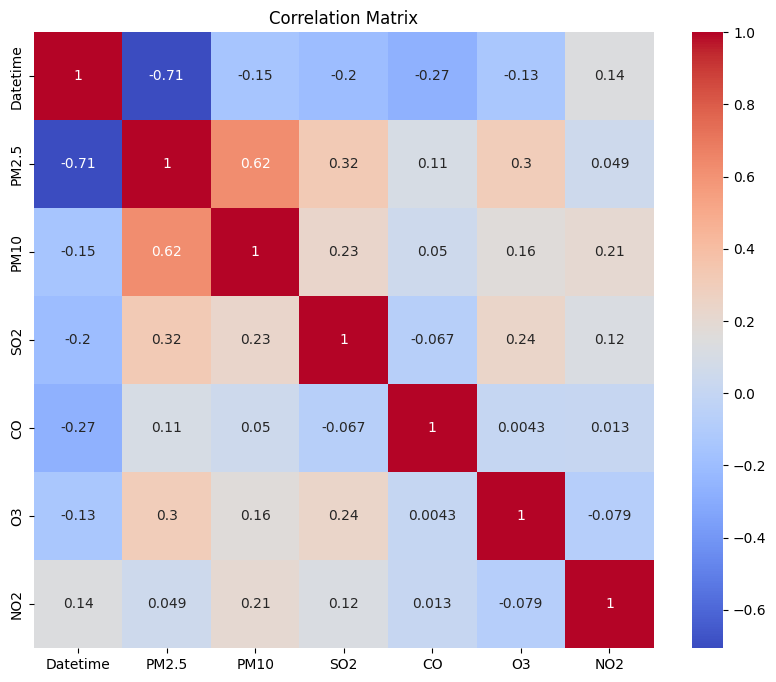

In [11]:
pollutants = ['Datetime', 'PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2']

corr_matrix = df[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

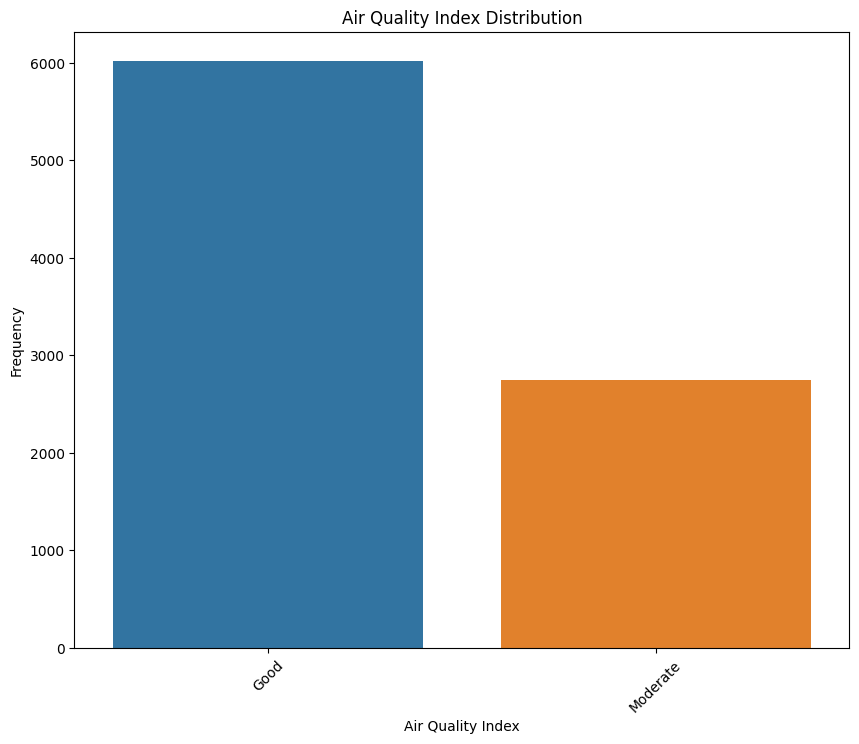

In [12]:
def calculate_air_quality_index(pollutants_concentration):
	if pollutants_concentration <= 50:
		return 'Good'
	elif pollutants_concentration <= 100:
		return 'Moderate'
	elif pollutants_concentration <= 200:
		return 'Unhealthy'
	elif pollutants_concentration <= 300:
		return 'Very Unhealthy'
	else:
		return 'Hazardous'

df['AQI'] = df['PM2.5'].apply(calculate_air_quality_index)

aqi_count = df['AQI'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=aqi_count.index, y=aqi_count.values)
plt.title('Air Quality Index Distribution')
plt.xlabel('Air Quality Index')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

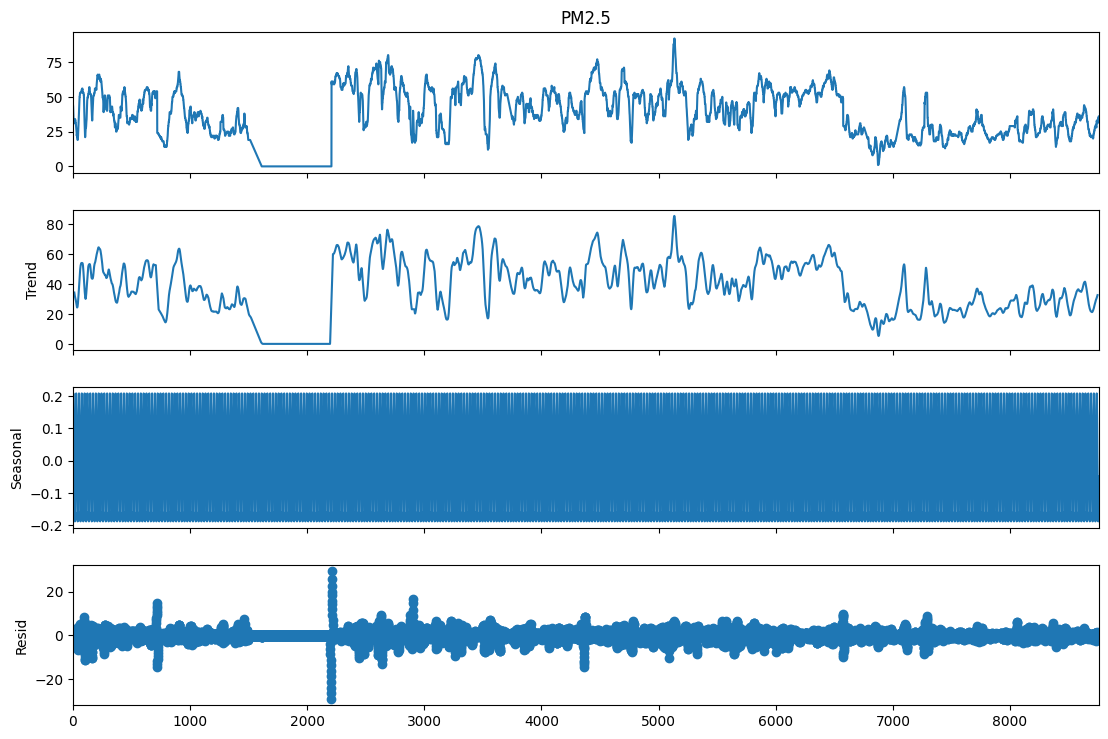

In [17]:
decomposition = seasonal_decompose(df['PM2.5'], model='additive', period=24)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

### Forecasting